### Mariam Adeyemo

Data Science in Healthcare Project

### Cancer Survival Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cancer patient data
cancer_df = pd.read_excel('Cancer patient data.xlsx')
cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT
3,1932-07-28,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT
4,1943-04-17,NaT,Male,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT


In [3]:
cancer_df.shape

(8468, 14)

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  8468 non-null   datetime64[ns]
 1   DEATH_DATE_off  447 non-null    datetime64[ns]
 2   sex             8468 non-null   object        
 3   race            8466 non-null   object        
 4   LUNG            8468 non-null   int64         
 5   PANCREAS        8468 non-null   int64         
 6   THYROID         8468 non-null   int64         
 7   COLORECTAL      8468 non-null   int64         
 8   MELANOMA        8468 non-null   int64         
 9   LUNG DT         1485 non-null   datetime64[ns]
 10  PANCREAS_DT     660 non-null    datetime64[ns]
 11  THYROID_DT      745 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 

In [5]:
# Rename the 'LUNG DT' column to 'LUNG_DT'
cancer_df = cancer_df.rename(columns={'LUNG DT': 'LUNG_DT'})
cancer_df.columns

Index(['BIRTH_DATE_off', 'DEATH_DATE_off', 'sex', 'race', 'LUNG', 'PANCREAS',
       'THYROID', 'COLORECTAL', 'MELANOMA', 'LUNG_DT', 'PANCREAS_DT',
       'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT'],
      dtype='object')

In [6]:
cancer_df.describe()

,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA
count,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000
mean,0.175366,0.077940,0.087978,0.111951,0.041096
std,0.380302,0.268094,0.283280,0.315325,0.198524
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cancer_df['sex'].value_counts()

Female    4290
Male      4178
Name: sex, dtype: int64

#### Remove all patients who do not have a diagnosis date.

In [8]:
# Filter out patients without a diagnosis date
cancer_df = cancer_df.dropna(subset=['LUNG_DT', 'PANCREAS_DT', 'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT'], how='all')
cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG_DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT
6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT
7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT


In [9]:
cancer_df.shape

(4153, 14)

#### Specify the end date of the analysis

In [10]:
cancer_df['end_date'] = pd.to_datetime('2016-08-25')
cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG_DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,end_date
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,2016-08-25
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,2016-08-25
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,2016-08-25
6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,2016-08-25
7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,2016-08-25


#### Data Censoring

Create a new column 'Censor_Status' to indicate whether a patient is censored or not. Patients who died before 8/25/16 should be marked as uncensored, and patients who died after or are still alive on or after 8/25/16 should be marked as censored.

Patient with missing 'DEATH_DATE_off' are considered as still alive, and therefore censored

In [11]:
# censor the data
cancer_df['Censor_Status'] = np.where(
    (cancer_df['DEATH_DATE_off'] > cancer_df['end_date']) | cancer_df['DEATH_DATE_off'].isnull(),
    0, # Assign 0 for censored (still alive or dead after the end date)
    1  # Assign 1 for uncensored (event occurred before the end date)
)
cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG_DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,end_date,Censor_Status
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,2016-08-25,0
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,2016-08-25,1
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,2016-08-25,1
6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,2016-08-25,0
7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,2016-08-25,0


#### Categorize race into White, African-American, Asian/Mideast-Indian, and Others.

In [12]:
# categorize the race information
cancer_df['race'] = cancer_df['race'].apply(lambda race: race if race in ['White', 'Black/African-American', 'Asian/Mideast Indian'] else 'Others')

In [13]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4153 entries, 0 to 8467
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4153 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4153 non-null   object        
 3   race            4153 non-null   object        
 4   LUNG            4153 non-null   int64         
 5   PANCREAS        4153 non-null   int64         
 6   THYROID         4153 non-null   int64         
 7   COLORECTAL      4153 non-null   int64         
 8   MELANOMA        4153 non-null   int64         
 9   LUNG_DT         1485 non-null   datetime64[ns]
 10  PANCREAS_DT     660 non-null    datetime64[ns]
 11  THYROID_DT      745 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  end_date        4153 non-null   datetime64[ns]
 15  Cens

#### Filter the dataset based on the type of cancer

In [14]:
lung_cancer_df = cancer_df[cancer_df['LUNG'] == 1].copy()
pancrease_cancer_df = cancer_df[cancer_df['PANCREAS'] == 1].copy()
thyroid_cancer_df = cancer_df[cancer_df['THYROID'] == 1].copy()
colorectal_cancer_df = cancer_df[cancer_df['COLORECTAL'] == 1].copy()
melanoma_cancer_df = cancer_df[cancer_df['MELANOMA'] == 1].copy()

lung_cancer_df.shape, pancrease_cancer_df.shape, thyroid_cancer_df.shape, colorectal_cancer_df.shape, melanoma_cancer_df.shape

((1485, 16), (660, 16), (745, 16), (946, 16), (346, 16))

In [15]:
# Remove unwanted columns from each cancer data
lung_cancer_df.drop(['PANCREAS', 'THYROID', 'COLORECTAL', 'MELANOMA', 'PANCREAS_DT', 'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT'], axis=1, inplace=True)
pancrease_cancer_df.drop(['LUNG', 'THYROID', 'COLORECTAL', 'MELANOMA', 'LUNG_DT', 'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT'], axis=1, inplace=True)
thyroid_cancer_df.drop(['LUNG', 'PANCREAS', 'COLORECTAL', 'MELANOMA', 'LUNG_DT', 'PANCREAS_DT', 'COLORECTAL_DT', 'MELANOMA_DT'], axis=1, inplace=True)
colorectal_cancer_df.drop(['LUNG', 'THYROID', 'PANCREAS', 'MELANOMA', 'LUNG_DT', 'THYROID_DT', 'PANCREAS_DT', 'MELANOMA_DT'], axis=1, inplace=True)
melanoma_cancer_df.drop(['LUNG', 'THYROID', 'COLORECTAL', 'PANCREAS', 'LUNG_DT', 'THYROID_DT', 'COLORECTAL_DT', 'PANCREAS_DT'], axis=1, inplace=True)

lung_cancer_df.shape, pancrease_cancer_df.shape, thyroid_cancer_df.shape, colorectal_cancer_df.shape, melanoma_cancer_df.shape

((1485, 8), (660, 8), (745, 8), (946, 8), (346, 8))

#### Calculate the age of each patient at the time of cancer diagnosis.

In [16]:
# Calculate the age at diagnosis and create a new column 'Age_at_Diagnosis'
lung_cancer_df['AGE_AT_DIAGNOSIS'] = round((lung_cancer_df['LUNG_DT'] - lung_cancer_df['BIRTH_DATE_off']).dt.days / 365)
pancrease_cancer_df['AGE_AT_DIAGNOSIS'] = round((pancrease_cancer_df['PANCREAS_DT'] - pancrease_cancer_df['BIRTH_DATE_off']).dt.days / 365)
thyroid_cancer_df['AGE_AT_DIAGNOSIS'] = round((thyroid_cancer_df['THYROID_DT'] - thyroid_cancer_df['BIRTH_DATE_off']).dt.days / 365)
colorectal_cancer_df['AGE_AT_DIAGNOSIS'] = round((colorectal_cancer_df['COLORECTAL_DT'] - colorectal_cancer_df['BIRTH_DATE_off']).dt.days / 365)
melanoma_cancer_df['AGE_AT_DIAGNOSIS'] = round((melanoma_cancer_df['MELANOMA_DT'] - melanoma_cancer_df['BIRTH_DATE_off']).dt.days / 365)

In [17]:
lung_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,LUNG_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS
0,1959-12-02,NaT,Male,Black/African-American,1,2013-09-01,2016-08-25,0,54.0
1,1955-11-18,2016-04-20,Male,Black/African-American,1,2016-04-02,2016-08-25,1,60.0
2,1946-01-14,2015-05-25,Female,Black/African-American,1,2015-04-11,2016-08-25,1,69.0
9,1957-10-18,NaT,Male,Black/African-American,1,2012-11-29,2016-08-25,0,55.0
12,1940-02-04,NaT,Male,Black/African-American,1,2013-05-21,2016-08-25,0,73.0


In [18]:
lung_cancer_df.describe()

,LUNG,Censor_Status,AGE_AT_DIAGNOSIS
count,1485.0,1485.000000,1485.000000
mean,1.0,0.123906,66.463973
std,0.0,0.329585,11.411954
min,1.0,0.000000,3.000000
25%,1.0,0.000000,59.000000
50%,1.0,0.000000,67.000000
75%,1.0,0.000000,74.000000
max,1.0,1.000000,103.000000


#### Categorize the age of patients in deciles

In [19]:
# Define the bins for age groups in deciles
bins = [1, 11, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

# Create labels for the age groups
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']


# Use pd.cut to categorize age into deciles
lung_cancer_df['Age_Group'] = pd.cut(lung_cancer_df['AGE_AT_DIAGNOSIS'], bins=bins, labels=labels)
lung_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,LUNG_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group
0,1959-12-02,NaT,Male,Black/African-American,1,2013-09-01,2016-08-25,0,54.0,51-60
1,1955-11-18,2016-04-20,Male,Black/African-American,1,2016-04-02,2016-08-25,1,60.0,51-60
2,1946-01-14,2015-05-25,Female,Black/African-American,1,2015-04-11,2016-08-25,1,69.0,61-70
9,1957-10-18,NaT,Male,Black/African-American,1,2012-11-29,2016-08-25,0,55.0,51-60
12,1940-02-04,NaT,Male,Black/African-American,1,2013-05-21,2016-08-25,0,73.0,71-80


In [20]:
pancrease_cancer_df.describe()

,PANCREAS,Censor_Status,AGE_AT_DIAGNOSIS
count,660.0,660.00000,660.000000
mean,1.0,0.05000,66.746970
std,0.0,0.21811,11.439273
min,1.0,0.00000,27.000000
25%,1.0,0.00000,59.000000
50%,1.0,0.00000,67.000000
75%,1.0,0.00000,74.250000
max,1.0,1.00000,97.000000


In [21]:
# Define the bins for age groups in increments of 10
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for the age groups
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Use pd.cut to categorize age into deciles
pancrease_cancer_df['Age_Group'] = pd.cut(pancrease_cancer_df['AGE_AT_DIAGNOSIS'], bins=bins, labels=labels)
pancrease_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,PANCREAS,PANCREAS_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group
44,1955-03-10,2012-11-22,Female,Black/African-American,1,2012-10-12,2016-08-25,1,58.0,51-60
55,1929-06-27,NaT,Female,Black/African-American,1,2016-01-27,2016-08-25,0,87.0,81-90
57,1938-06-24,NaT,Male,White,1,2013-11-19,2016-08-25,0,75.0,71-80
92,1952-08-30,2016-11-21,Male,Black/African-American,1,2014-10-27,2016-08-25,0,62.0,61-70
118,1956-07-15,2016-04-22,Male,Black/African-American,1,2016-03-13,2016-08-25,1,60.0,51-60


In [22]:
thyroid_cancer_df.describe()

,THYROID,Censor_Status,AGE_AT_DIAGNOSIS
count,745.0,745.000000,745.000000
mean,1.0,0.010738,49.016107
std,0.0,0.103137,16.393096
min,1.0,0.000000,1.000000
25%,1.0,0.000000,37.000000
50%,1.0,0.000000,51.000000
75%,1.0,0.000000,62.000000
max,1.0,1.000000,87.000000


In [23]:
thyroid_cancer_df[thyroid_cancer_df['AGE_AT_DIAGNOSIS'] == 1]

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,THYROID,THYROID_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS
4947,2014-12-21,NaT,Male,White,1,2015-10-17,2016-08-25,0,1.0


In [24]:
# Define the bins for age groups in deciles
bins = [1, 11, 20, 30, 40, 50, 60, 70, 80, 90]

# Create labels for the age groups
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']


# Use pd.cut to categorize age into deciles
thyroid_cancer_df['Age_Group'] = pd.cut(thyroid_cancer_df['AGE_AT_DIAGNOSIS'], bins=bins, labels=labels)
thyroid_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,THYROID,THYROID_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group
6,1946-11-03,NaT,Female,Black/African-American,1,2012-11-29,2016-08-25,0,66.0,61-70
7,1938-06-10,NaT,Female,Black/African-American,1,2012-06-24,2016-08-25,0,74.0,71-80
28,1948-02-17,NaT,Female,Black/African-American,1,2012-09-02,2016-08-25,0,65.0,61-70
32,1949-09-04,NaT,Female,White,1,2014-03-19,2016-08-25,0,65.0,61-70
98,1949-12-15,NaT,Female,Black/African-American,1,2013-02-26,2016-08-25,0,63.0,61-70


In [25]:
colorectal_cancer_df.describe()

,COLORECTAL,Censor_Status,AGE_AT_DIAGNOSIS
count,946.0,946.000000,946.000000
mean,1.0,0.061311,61.234672
std,0.0,0.240026,13.694084
min,1.0,0.000000,16.000000
25%,1.0,0.000000,52.000000
50%,1.0,0.000000,62.000000
75%,1.0,0.000000,71.000000
max,1.0,1.000000,97.000000


In [26]:
# Define the bins for age groups in deciles
bins = [11, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for the age groups
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']


# Use pd.cut to categorize age into deciles
colorectal_cancer_df['Age_Group'] = pd.cut(colorectal_cancer_df['AGE_AT_DIAGNOSIS'], bins=bins, labels=labels)
colorectal_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,COLORECTAL,COLORECTAL_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group
13,1971-08-11,NaT,Female,Black/African-American,1,2014-01-01,2016-08-25,0,42.0,41-50
14,1948-03-22,2016-01-07,Female,Black/African-American,1,2014-09-30,2016-08-25,1,67.0,61-70
16,1946-01-09,NaT,Female,Black/African-American,1,2013-09-14,2016-08-25,0,68.0,61-70
36,1970-12-19,NaT,Female,White,1,2013-12-09,2016-08-25,0,43.0,41-50
41,1928-03-25,NaT,Female,Black/African-American,1,2013-12-11,2016-08-25,0,86.0,81-90


In [27]:
melanoma_cancer_df.describe()

,MELANOMA,Censor_Status,AGE_AT_DIAGNOSIS
count,346.0,346.000000,346.000000
mean,1.0,0.049133,58.020231
std,0.0,0.216459,16.944142
min,1.0,0.000000,13.000000
25%,1.0,0.000000,47.000000
50%,1.0,0.000000,60.000000
75%,1.0,0.000000,70.000000
max,1.0,1.000000,95.000000


In [28]:
# Define the bins for age groups in deciles
bins = [11, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for the age groups
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']


# Use pd.cut to categorize age into deciles
melanoma_cancer_df['Age_Group'] = pd.cut(melanoma_cancer_df['AGE_AT_DIAGNOSIS'], bins=bins, labels=labels)
melanoma_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,MELANOMA,MELANOMA_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group
146,1928-06-22,NaT,Male,White,1,2015-03-03,2016-08-25,0,87.0,81-90
178,1933-12-27,2014-11-27,Male,White,1,2012-12-20,2016-08-25,1,79.0,71-80
196,1924-04-08,NaT,Female,White,1,2014-05-31,2016-08-25,0,90.0,81-90
341,1957-10-04,NaT,Female,White,1,2013-05-19,2016-08-25,0,56.0,51-60
354,1966-08-03,NaT,Male,White,1,2015-03-09,2016-08-25,0,49.0,41-50


In [29]:
## Fill NaN values in 'DEATH_DATE_off' with the corresponding 'end_date'
lung_cancer_df['DEATH_DATE_off'].fillna(lung_cancer_df['end_date'], inplace=True)
pancrease_cancer_df['DEATH_DATE_off'].fillna(pancrease_cancer_df['end_date'], inplace=True)
thyroid_cancer_df['DEATH_DATE_off'].fillna(thyroid_cancer_df['end_date'], inplace=True)
colorectal_cancer_df['DEATH_DATE_off'].fillna(colorectal_cancer_df['end_date'], inplace=True)
melanoma_cancer_df['DEATH_DATE_off'].fillna(melanoma_cancer_df['end_date'], inplace=True)

lung_cancer_df.shape, pancrease_cancer_df.shape, thyroid_cancer_df.shape, colorectal_cancer_df.shape, melanoma_cancer_df.shape

((1485, 10), (660, 10), (745, 10), (946, 10), (346, 10))

In [31]:
melanoma_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,MELANOMA,MELANOMA_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group
146,1928-06-22,2016-08-25,Male,White,1,2015-03-03,2016-08-25,0,87.0,81-90
178,1933-12-27,2014-11-27,Male,White,1,2012-12-20,2016-08-25,1,79.0,71-80
196,1924-04-08,2016-08-25,Female,White,1,2014-05-31,2016-08-25,0,90.0,81-90
341,1957-10-04,2016-08-25,Female,White,1,2013-05-19,2016-08-25,0,56.0,51-60
354,1966-08-03,2016-08-25,Male,White,1,2015-03-09,2016-08-25,0,49.0,41-50


#### Calculate the time to event for each patient per cancer data

In [32]:
lung_cancer_df['Time_to_Event'] = np.where(
    lung_cancer_df['Censor_Status'] == 0,
    (lung_cancer_df['DEATH_DATE_off'] - lung_cancer_df['LUNG_DT']).dt.days,
    (lung_cancer_df['DEATH_DATE_off'] - lung_cancer_df['LUNG_DT']).dt.days
)

pancrease_cancer_df['Time_to_Event'] = np.where(
    pancrease_cancer_df['Censor_Status'] == 0,
    (pancrease_cancer_df['DEATH_DATE_off'] - pancrease_cancer_df['PANCREAS_DT']).dt.days,
    (pancrease_cancer_df['DEATH_DATE_off'] - pancrease_cancer_df['PANCREAS_DT']).dt.days
)

thyroid_cancer_df['Time_to_Event'] = np.where(
    thyroid_cancer_df['Censor_Status'] == 0,
    (thyroid_cancer_df['DEATH_DATE_off'] - thyroid_cancer_df['THYROID_DT']).dt.days,
    (thyroid_cancer_df['DEATH_DATE_off'] - thyroid_cancer_df['THYROID_DT']).dt.days
)

colorectal_cancer_df['Time_to_Event'] = np.where(
    colorectal_cancer_df['Censor_Status'] == 0,
    (colorectal_cancer_df['DEATH_DATE_off'] - colorectal_cancer_df['COLORECTAL_DT']).dt.days,
    (colorectal_cancer_df['DEATH_DATE_off'] - colorectal_cancer_df['COLORECTAL_DT']).dt.days
)

melanoma_cancer_df['Time_to_Event'] = np.where(
    melanoma_cancer_df['Censor_Status'] == 0,
    (melanoma_cancer_df['DEATH_DATE_off'] - melanoma_cancer_df['MELANOMA_DT']).dt.days,
    (melanoma_cancer_df['DEATH_DATE_off'] - melanoma_cancer_df['MELANOMA_DT']).dt.days
)

In [33]:
lung_cancer_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,LUNG_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group,Time_to_Event
0,1959-12-02,2016-08-25,Male,Black/African-American,1,2013-09-01,2016-08-25,0,54.0,51-60,1089
1,1955-11-18,2016-04-20,Male,Black/African-American,1,2016-04-02,2016-08-25,1,60.0,51-60,18
2,1946-01-14,2015-05-25,Female,Black/African-American,1,2015-04-11,2016-08-25,1,69.0,61-70,44
9,1957-10-18,2016-08-25,Male,Black/African-American,1,2012-11-29,2016-08-25,0,55.0,51-60,1365
12,1940-02-04,2016-08-25,Male,Black/African-American,1,2013-05-21,2016-08-25,0,73.0,71-80,1192


#### Remove all diagnosis after 8/25/16.

In [34]:
# Check the number of diagnosis after the end date for each cancer data 
lung_cancer_diagnoses_after_end_date = lung_cancer_df[lung_cancer_df['LUNG_DT'] > lung_cancer_df['end_date']]
pancrease_cancer_diagnoses_after_end_date = pancrease_cancer_df[pancrease_cancer_df['PANCREAS_DT'] > pancrease_cancer_df['end_date']]
thyroid_cancer_diagnoses_after_end_date = thyroid_cancer_df[thyroid_cancer_df['THYROID_DT'] > thyroid_cancer_df['end_date']]
colorectal_cancer_diagnoses_after_end_date = colorectal_cancer_df[colorectal_cancer_df['COLORECTAL_DT'] > colorectal_cancer_df['end_date']]
melanoma_cancer_diagnoses_after_end_date = melanoma_cancer_df[melanoma_cancer_df['MELANOMA_DT'] > melanoma_cancer_df['end_date']]

print(f'Number of Lung diagnoses after the end date: {len(lung_cancer_diagnoses_after_end_date)}')
print(f'Number of Pancreas diagnoses after the end date: {len(pancrease_cancer_diagnoses_after_end_date)}')
print(f'Number of Thyroid diagnoses after the end date: {len(thyroid_cancer_diagnoses_after_end_date)}')
print(f'Number of Colorectal diagnoses after the end date: {len(colorectal_cancer_diagnoses_after_end_date)}')
print(f'Number of Melanoma diagnoses after the end date: {len(melanoma_cancer_diagnoses_after_end_date)}')

Number of Lung diagnoses after the end date: 2
Number of Pancreas diagnoses after the end date: 2
Number of Thyroid diagnoses after the end date: 1
Number of Colorectal diagnoses after the end date: 0
Number of Melanoma diagnoses after the end date: 0


In [35]:
# Remove diagnoses after 8/25/16 for lung cancer
lung_cancer_df = lung_cancer_df[lung_cancer_df['LUNG_DT'] <= lung_cancer_df['end_date']]

# Remove diagnoses after 8/25/16 for pancreatic cancer
pancrease_cancer_df = pancrease_cancer_df[pancrease_cancer_df['PANCREAS_DT'] <= pancrease_cancer_df['end_date']]

# Remove diagnoses after 8/25/16 for thyroid cancer
thyroid_cancer_df = thyroid_cancer_df[thyroid_cancer_df['THYROID_DT'] <= thyroid_cancer_df['end_date']]

lung_cancer_df.shape, pancrease_cancer_df.shape, thyroid_cancer_df.shape

((1483, 11), (658, 11), (744, 11))

#### EDA and Handling Missing Data

In [36]:
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 8446
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BIRTH_DATE_off    1483 non-null   datetime64[ns]
 1   DEATH_DATE_off    1483 non-null   datetime64[ns]
 2   sex               1483 non-null   object        
 3   race              1483 non-null   object        
 4   LUNG              1483 non-null   int64         
 5   LUNG_DT           1483 non-null   datetime64[ns]
 6   end_date          1483 non-null   datetime64[ns]
 7   Censor_Status     1483 non-null   int32         
 8   AGE_AT_DIAGNOSIS  1483 non-null   float64       
 9   Age_Group         1483 non-null   category      
 10  Time_to_Event     1483 non-null   int64         
dtypes: category(1), datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 123.5+ KB


In [37]:
lung_cancer_df['race'].value_counts()

White                     910
Black/African-American    475
Others                     58
Asian/Mideast Indian       40
Name: race, dtype: int64

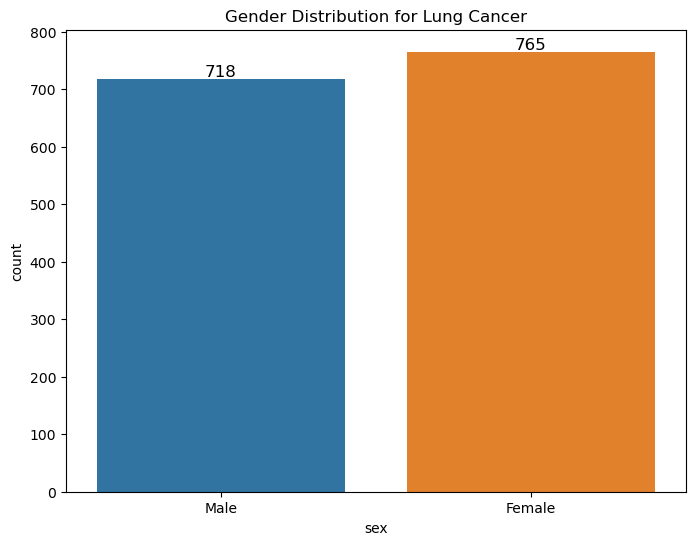

In [38]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=lung_cancer_df)
plt.title('Gender Distribution for Lung Cancer')

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [39]:
lung_cancer_df.describe()

,LUNG,Censor_Status,AGE_AT_DIAGNOSIS,Time_to_Event
count,1483.0,1483.000000,1483.000000,1483.000000
mean,1.0,0.124073,66.454484,944.787593
std,0.0,0.329776,11.415998,605.410724
min,1.0,0.000000,3.000000,-360.000000
25%,1.0,0.000000,59.000000,484.500000
50%,1.0,0.000000,67.000000,903.000000
75%,1.0,0.000000,74.000000,1330.000000
max,1.0,1.000000,103.000000,5497.000000


In [40]:
pancrease_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 44 to 8420
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BIRTH_DATE_off    658 non-null    datetime64[ns]
 1   DEATH_DATE_off    658 non-null    datetime64[ns]
 2   sex               658 non-null    object        
 3   race              658 non-null    object        
 4   PANCREAS          658 non-null    int64         
 5   PANCREAS_DT       658 non-null    datetime64[ns]
 6   end_date          658 non-null    datetime64[ns]
 7   Censor_Status     658 non-null    int32         
 8   AGE_AT_DIAGNOSIS  658 non-null    float64       
 9   Age_Group         658 non-null    category      
 10  Time_to_Event     658 non-null    int64         
dtypes: category(1), datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 55.0+ KB


In [41]:
pancrease_cancer_df['race'].value_counts()

White                     444
Black/African-American    146
Others                     60
Asian/Mideast Indian        8
Name: race, dtype: int64

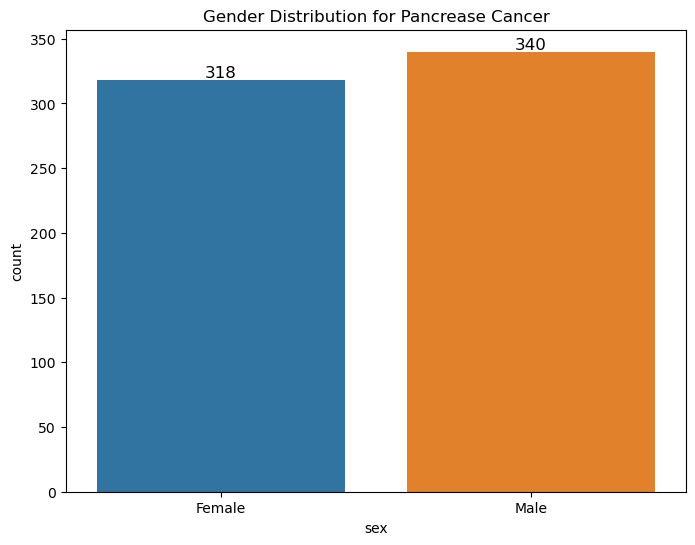

In [42]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=pancrease_cancer_df)
plt.title('Gender Distribution for Pancrease Cancer')

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [43]:
pancrease_cancer_df.describe()

,PANCREAS,Censor_Status,AGE_AT_DIAGNOSIS,Time_to_Event
count,658.0,658.000000,658.000000,658.000000
mean,1.0,0.050152,66.717325,907.516717
std,0.0,0.218424,11.442359,491.894044
min,1.0,0.000000,27.000000,4.000000
25%,1.0,0.000000,59.000000,512.250000
50%,1.0,0.000000,67.000000,885.000000
75%,1.0,0.000000,74.000000,1258.750000
max,1.0,1.000000,97.000000,2890.000000


In [44]:
thyroid_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 6 to 8463
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BIRTH_DATE_off    744 non-null    datetime64[ns]
 1   DEATH_DATE_off    744 non-null    datetime64[ns]
 2   sex               744 non-null    object        
 3   race              744 non-null    object        
 4   THYROID           744 non-null    int64         
 5   THYROID_DT        744 non-null    datetime64[ns]
 6   end_date          744 non-null    datetime64[ns]
 7   Censor_Status     744 non-null    int32         
 8   AGE_AT_DIAGNOSIS  744 non-null    float64       
 9   Age_Group         743 non-null    category      
 10  Time_to_Event     744 non-null    int64         
dtypes: category(1), datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 62.1+ KB


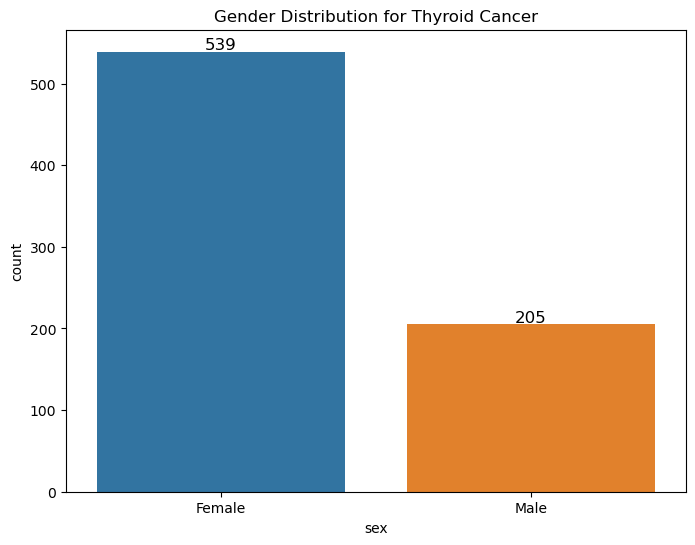

In [45]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=thyroid_cancer_df)
plt.title('Gender Distribution for Thyroid Cancer')

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [46]:
thyroid_cancer_df.describe()

,THYROID,Censor_Status,AGE_AT_DIAGNOSIS,Time_to_Event
count,744.0,744.000000,744.000000,744.000000
mean,1.0,0.010753,49.028226,1384.758065
std,0.0,0.103206,16.400785,1692.029242
min,1.0,0.000000,1.000000,0.000000
25%,1.0,0.000000,37.000000,713.750000
50%,1.0,0.000000,51.000000,1092.000000
75%,1.0,0.000000,62.000000,1478.000000
max,1.0,1.000000,87.000000,20665.000000


In [47]:
# Filter the dataset to get rows where the specified column matches the max value for the column "Time_to_Event"
filtered_data = thyroid_cancer_df[thyroid_cancer_df['Time_to_Event'] == 20665.000000]
filtered_data

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,THYROID,THYROID_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group,Time_to_Event
2553,1943-02-09,2016-08-25,Female,White,1,1960-01-27,2016-08-25,0,17.0,11-20,20665


In [48]:
colorectal_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 13 to 8452
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BIRTH_DATE_off    946 non-null    datetime64[ns]
 1   DEATH_DATE_off    946 non-null    datetime64[ns]
 2   sex               946 non-null    object        
 3   race              946 non-null    object        
 4   COLORECTAL        946 non-null    int64         
 5   COLORECTAL_DT     946 non-null    datetime64[ns]
 6   end_date          946 non-null    datetime64[ns]
 7   Censor_Status     946 non-null    int32         
 8   AGE_AT_DIAGNOSIS  946 non-null    float64       
 9   Age_Group         946 non-null    category      
 10  Time_to_Event     946 non-null    int64         
dtypes: category(1), datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 78.9+ KB


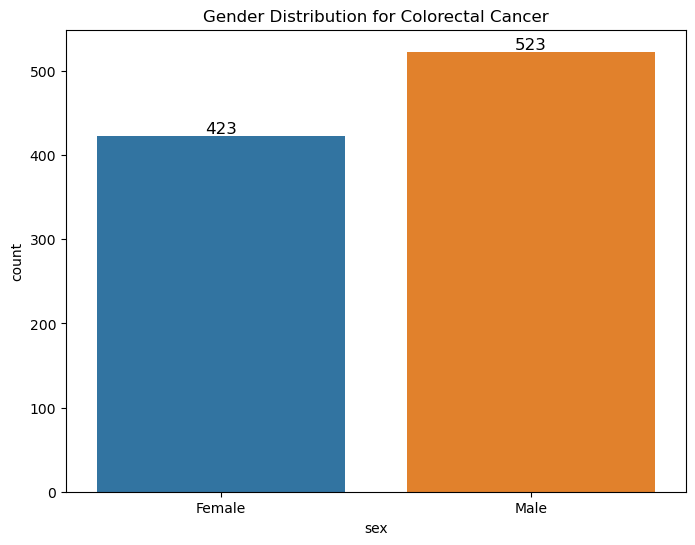

In [49]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=colorectal_cancer_df)
plt.title('Gender Distribution for Colorectal Cancer')

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [50]:
colorectal_cancer_df.describe()

,COLORECTAL,Censor_Status,AGE_AT_DIAGNOSIS,Time_to_Event
count,946.0,946.000000,946.000000,946.000000
mean,1.0,0.061311,61.234672,1157.638478
std,0.0,0.240026,13.694084,851.380387
min,1.0,0.000000,16.000000,0.000000
25%,1.0,0.000000,52.000000,586.750000
50%,1.0,0.000000,62.000000,1006.000000
75%,1.0,0.000000,71.000000,1445.000000
max,1.0,1.000000,97.000000,6094.000000


In [51]:
melanoma_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 146 to 8467
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BIRTH_DATE_off    346 non-null    datetime64[ns]
 1   DEATH_DATE_off    346 non-null    datetime64[ns]
 2   sex               346 non-null    object        
 3   race              346 non-null    object        
 4   MELANOMA          346 non-null    int64         
 5   MELANOMA_DT       346 non-null    datetime64[ns]
 6   end_date          346 non-null    datetime64[ns]
 7   Censor_Status     346 non-null    int32         
 8   AGE_AT_DIAGNOSIS  346 non-null    float64       
 9   Age_Group         346 non-null    category      
 10  Time_to_Event     346 non-null    int64         
dtypes: category(1), datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 29.1+ KB


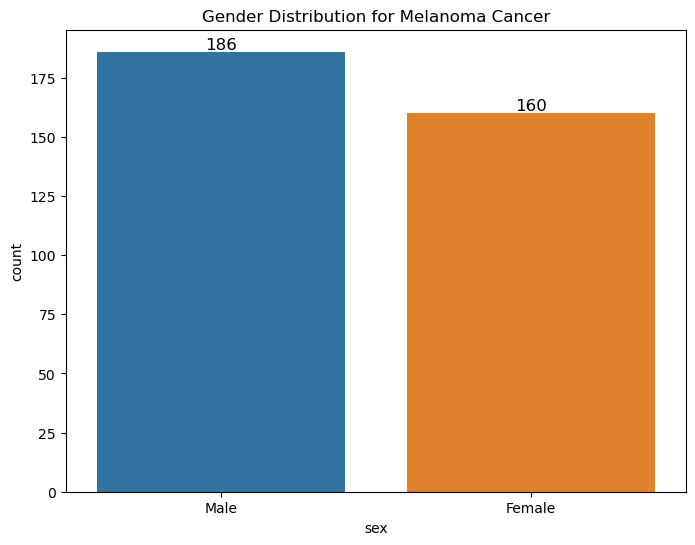

In [52]:
# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=melanoma_cancer_df)
plt.title('Gender Distribution for Melanoma Cancer')

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [53]:
melanoma_cancer_df.describe()

,MELANOMA,Censor_Status,AGE_AT_DIAGNOSIS,Time_to_Event
count,346.0,346.000000,346.000000,346.000000
mean,1.0,0.049133,58.020231,1346.867052
std,0.0,0.216459,16.944142,1409.172435
min,1.0,0.000000,13.000000,0.000000
25%,1.0,0.000000,47.000000,592.250000
50%,1.0,0.000000,60.000000,990.000000
75%,1.0,0.000000,70.000000,1451.750000
max,1.0,1.000000,95.000000,11042.000000


In [54]:
# Filter the dataset to get rows where the specified column matches the max value for the column "Time_to_Event"
filtered_data = melanoma_cancer_df[melanoma_cancer_df['Time_to_Event'] == 11042.000000]
filtered_data

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,MELANOMA,MELANOMA_DT,end_date,Censor_Status,AGE_AT_DIAGNOSIS,Age_Group,Time_to_Event
1202,1946-01-17,2016-08-25,Female,White,1,1986-06-02,2016-08-25,0,40.0,31-40,11042


#### Analyze survival rates for the above 5 cancers categorized by gender, race and age group

#### Lung Cancer survival rate by the different categories

In [38]:
#!pip install lifelines

In [55]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [56]:
# If census_status == 0, then dead == 0
# If census_status == 1, then dead == 1

lung_cancer_df.loc[lung_cancer_df.Censor_Status == 0, 'dead'] = 0
lung_cancer_df.loc[lung_cancer_df.Censor_Status == 1, 'dead'] = 1

In [57]:
lung_cancer_df['dead'].value_counts()

0.0    1299
1.0     184
Name: dead, dtype: int64

In [58]:
lung_cancer_df['Age_Group'].value_counts()

61-70      499
71-80      415
51-60      311
81-90      135
41-50       85
31-40       16
91-100      10
21-30        7
11-20        3
1-10         1
101-110      1
Name: Age_Group, dtype: int64

In [59]:
# Create subsets for each combination
male_subset = lung_cancer_df[lung_cancer_df['sex'] == 'Male']
female_subset = lung_cancer_df[lung_cancer_df['sex'] == 'Female']

white_subset = lung_cancer_df[lung_cancer_df['race'] == 'White']
african_american_subset = lung_cancer_df[lung_cancer_df['race'] == 'Black/African-American']
asian_subset = lung_cancer_df[lung_cancer_df['race'] == 'Asian/Mideast Indian']
others_subset = lung_cancer_df[lung_cancer_df['race'] == 'Others']


age_1_10_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '1-10']
age_11_20_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '11-20']
age_21_30_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '21-30']
age_31_40_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '31-40']
age_41_50_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '41-50']
age_51_60_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '51-60']
age_61_70_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '61-70']
age_71_80_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '71-80']
age_81_90_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '81-90']
age_91_100_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '91-100']
age_101_110_subset = lung_cancer_df[lung_cancer_df['Age_Group'] == '101-110']

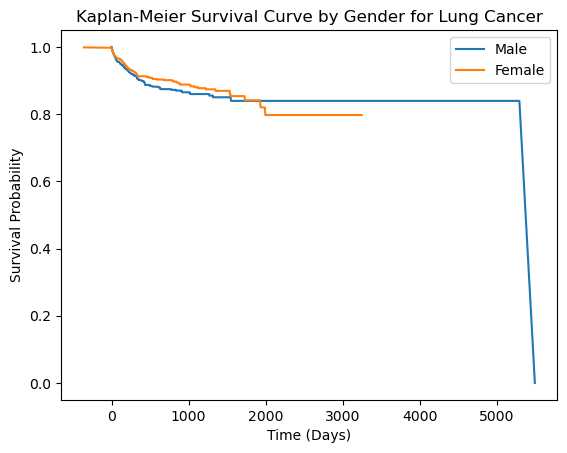

In [60]:
# Create a KaplanMeierFitter instance
kmf_lung_m = KaplanMeierFitter()
kmf_lung_f = KaplanMeierFitter()

ax = plt.subplot(111)

# Calculate and plot survival curve for males
kmf_lung_m.fit(male_subset['Time_to_Event'], event_observed=male_subset['dead'], label='Male')
kmf_lung_m.survival_function_.plot(ax=ax)

# Calculate and plot survival curve for females
kmf_lung_f.fit(female_subset['Time_to_Event'], event_observed=female_subset['dead'], label='Female')
kmf_lung_f.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Gender for Lung Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

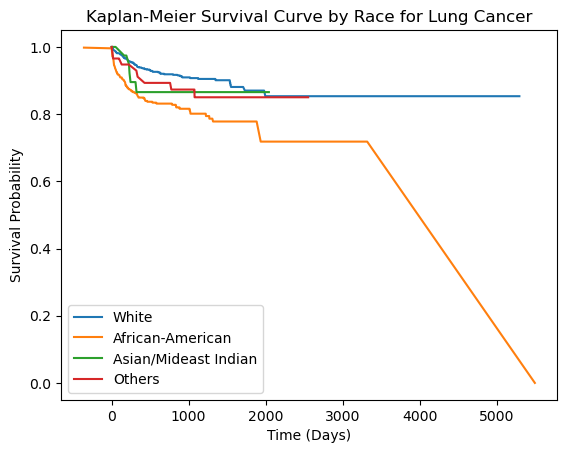

In [61]:
# Create a KaplanMeierFitter instance
kmf_lung_w = KaplanMeierFitter()
kmf_lung_aa = KaplanMeierFitter()
kmf_lung_ai = KaplanMeierFitter()
kmf_lung_o = KaplanMeierFitter()


ax = plt.subplot(111)

# White
kmf_lung_w.fit(white_subset['Time_to_Event'], event_observed=white_subset['dead'], label='White')
kmf_lung_w.survival_function_.plot(ax=ax)

# African-American
kmf_lung_aa.fit(african_american_subset['Time_to_Event'], event_observed=african_american_subset['dead'], label='African-American')
kmf_lung_aa.survival_function_.plot(ax=ax)

# Asian/Mideast Indian
kmf_lung_ai.fit(asian_subset['Time_to_Event'], event_observed=asian_subset['dead'], label='Asian/Mideast Indian')
kmf_lung_ai.survival_function_.plot(ax=ax)    

# Others
kmf_lung_o.fit(others_subset['Time_to_Event'], event_observed=others_subset['dead'], label='Others')
kmf_lung_o.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Race for Lung Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

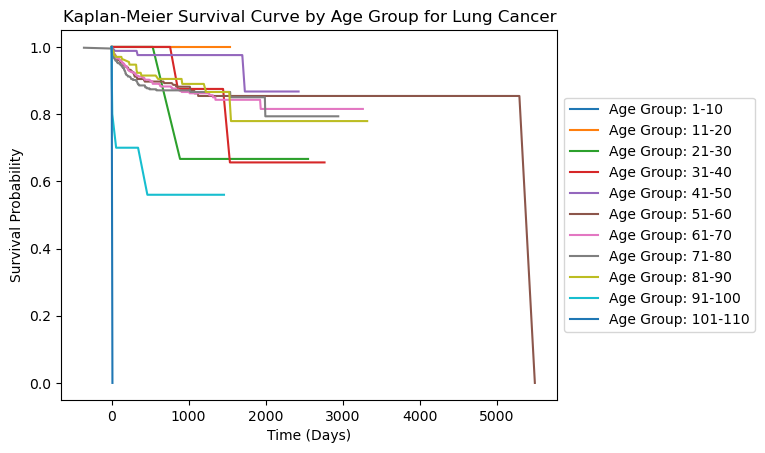

In [62]:
# Create a KaplanMeierFitter instance
kmf_lung_age = KaplanMeierFitter()

ax = plt.subplot(111)

# List of age group subsets
age_group_subsets = [
    age_1_10_subset, age_11_20_subset, age_21_30_subset, age_31_40_subset, age_41_50_subset,
    age_51_60_subset, age_61_70_subset, age_71_80_subset, age_81_90_subset,
    age_91_100_subset, age_101_110_subset
]

# Labels for each age group
age_group_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']

# Iterate over age group subsets and plot survival curves
for i, age_group_subset in enumerate(age_group_subsets):
    kmf_lung_age.fit(age_group_subset['Time_to_Event'], event_observed=age_group_subset['dead'], label=f'Age Group: {age_group_labels[i]}')
    kmf_lung_age.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Age Group for Lung Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Pancrease Cancer survival rate by the different categories

In [63]:
# If census_status == 0, then dead == 0
# If census_status == 1, then dead == 1

pancrease_cancer_df.loc[pancrease_cancer_df.Censor_Status == 0, 'dead'] = 0
pancrease_cancer_df.loc[pancrease_cancer_df.Censor_Status == 1, 'dead'] = 1

In [64]:
pancrease_cancer_df['dead'].value_counts()

0.0    625
1.0     33
Name: dead, dtype: int64

In [65]:
pancrease_cancer_df['Age_Group'].value_counts()

61-70     217
71-80     180
51-60     139
81-90      63
41-50      37
31-40       9
91-100      9
21-30       4
Name: Age_Group, dtype: int64

In [66]:
pancrease_cancer_df['race'].value_counts()

White                     444
Black/African-American    146
Others                     60
Asian/Mideast Indian        8
Name: race, dtype: int64

In [67]:
# Create subsets for each combination
male_subset = pancrease_cancer_df[pancrease_cancer_df['sex'] == 'Male']
female_subset = pancrease_cancer_df[pancrease_cancer_df['sex'] == 'Female']

white_subset = pancrease_cancer_df[pancrease_cancer_df['race'] == 'White']
african_american_subset = pancrease_cancer_df[pancrease_cancer_df['race'] == 'Black/African-American']
asian_subset = pancrease_cancer_df[pancrease_cancer_df['race'] == 'Asian/Mideast Indian']
others_subset = pancrease_cancer_df[pancrease_cancer_df['race'] == 'Others']


age_21_30_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '21-30']
age_31_40_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '31-40']
age_41_50_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '41-50']
age_51_60_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '51-60']
age_61_70_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '61-70']
age_71_80_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '71-80']
age_81_90_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '81-90']
age_91_100_subset = pancrease_cancer_df[pancrease_cancer_df['Age_Group'] == '91-100']

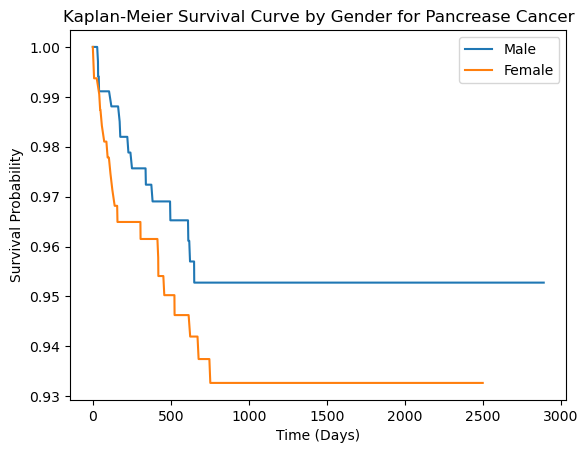

In [68]:
# Create a KaplanMeierFitter instance
kmf_pancrease_m = KaplanMeierFitter()
kmf_pancrease_f = KaplanMeierFitter()

ax = plt.subplot(111)

# Calculate and plot survival curve for males
kmf_pancrease_m.fit(male_subset['Time_to_Event'], event_observed=male_subset['dead'], label='Male')
kmf_pancrease_m.survival_function_.plot(ax=ax)

# Calculate and plot survival curve for females
kmf_pancrease_f.fit(female_subset['Time_to_Event'], event_observed=female_subset['dead'], label='Female')
kmf_pancrease_f.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Gender for Pancrease Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

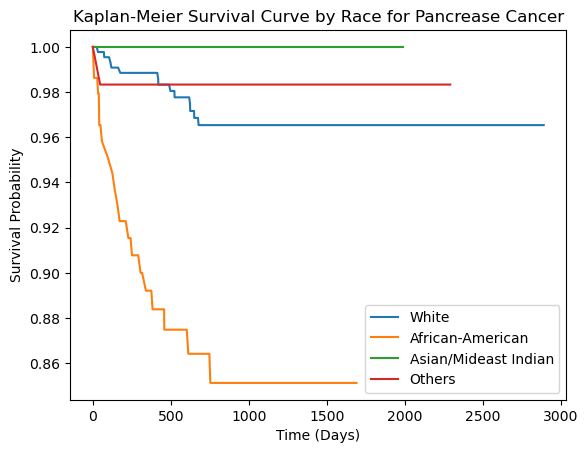

In [69]:
# Create a KaplanMeierFitter instance
kmf_pancrease_w = KaplanMeierFitter()
kmf_pancrease_aa = KaplanMeierFitter()
kmf_pancrease_ai = KaplanMeierFitter()
kmf_pancrease_o = KaplanMeierFitter()


ax = plt.subplot(111)

# White
kmf_pancrease_w.fit(white_subset['Time_to_Event'], event_observed=white_subset['dead'], label='White')
kmf_pancrease_w.survival_function_.plot(ax=ax)  

# African-American
kmf_pancrease_aa.fit(african_american_subset['Time_to_Event'], event_observed=african_american_subset['dead'], label='African-American')
kmf_pancrease_aa.survival_function_.plot(ax=ax) 

# Asian/Mideast Indian
kmf_pancrease_ai.fit(asian_subset['Time_to_Event'], event_observed=asian_subset['dead'], label='Asian/Mideast Indian')
kmf_pancrease_ai.survival_function_.plot(ax=ax)

# Others
kmf_pancrease_o.fit(others_subset['Time_to_Event'], event_observed=others_subset['dead'], label='Others')
kmf_pancrease_o.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Race for Pancrease Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

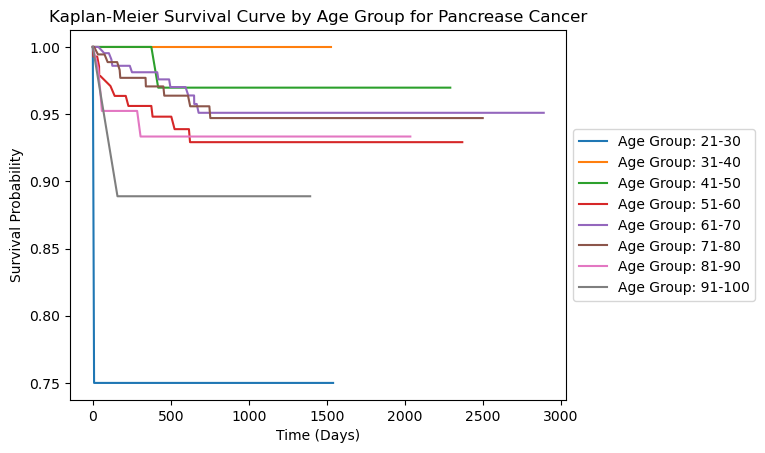

In [70]:
# Create a KaplanMeierFitter instance
kmf_pancrease_age = KaplanMeierFitter()

ax = plt.subplot(111)

# List of age group subsets
age_group_subsets = [
    age_21_30_subset, age_31_40_subset, age_41_50_subset,
    age_51_60_subset, age_61_70_subset, age_71_80_subset, age_81_90_subset,
    age_91_100_subset
]

# Labels for each age group
age_group_labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Iterate over age group subsets and plot survival curves
for i, age_group_subset in enumerate(age_group_subsets):
    kmf_pancrease_age.fit(age_group_subset['Time_to_Event'], event_observed=age_group_subset['dead'], label=f'Age Group: {age_group_labels[i]}')
    kmf_pancrease_age.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Age Group for Pancrease Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Thyroid Cancer survival rate by the different categories

In [71]:
# If census_status == 0, then dead == 0
# If census_status == 1, then dead == 1

thyroid_cancer_df.loc[thyroid_cancer_df.Censor_Status == 0, 'dead'] = 0
thyroid_cancer_df.loc[thyroid_cancer_df.Censor_Status == 1, 'dead'] = 1

In [72]:
thyroid_cancer_df['dead'].value_counts()

0.0    736
1.0      8
Name: dead, dtype: int64

In [73]:
thyroid_cancer_df['Age_Group'].value_counts()

51-60    168
61-70    162
41-50    131
31-40    123
21-30     68
71-80     42
11-20     33
81-90     10
1-10       6
Name: Age_Group, dtype: int64

In [74]:
thyroid_cancer_df['race'].value_counts()

White                     554
Others                     82
Black/African-American     71
Asian/Mideast Indian       37
Name: race, dtype: int64

In [75]:
# Create subsets for each combination
male_subset = thyroid_cancer_df[thyroid_cancer_df['sex'] == 'Male']
female_subset = thyroid_cancer_df[thyroid_cancer_df['sex'] == 'Female']

white_subset = thyroid_cancer_df[thyroid_cancer_df['race'] == 'White']
african_american_subset = thyroid_cancer_df[thyroid_cancer_df['race'] == 'Black/African-American']
asian_subset = thyroid_cancer_df[thyroid_cancer_df['race'] == 'Asian/Mideast Indian']
others_subset = thyroid_cancer_df[thyroid_cancer_df['race'] == 'Others']


age_1_10_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '1-10']
age_11_20_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '11-20']
age_21_30_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '21-30']
age_31_40_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '31-40']
age_41_50_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '41-50']
age_51_60_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '51-60']
age_61_70_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '61-70']
age_71_80_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '71-80']
age_81_90_subset = thyroid_cancer_df[thyroid_cancer_df['Age_Group'] == '81-90']

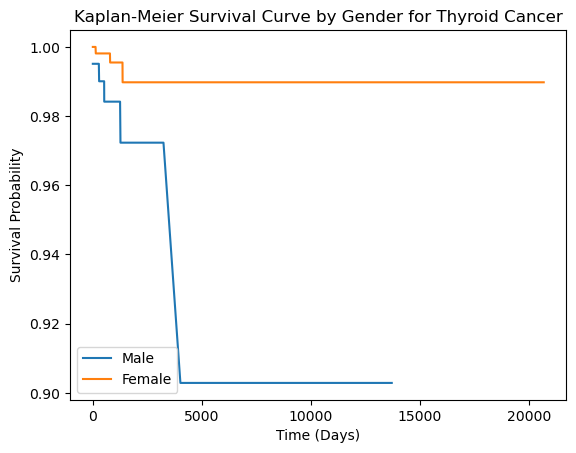

In [76]:
# Create a KaplanMeierFitter instance
kmf_thyroid_m = KaplanMeierFitter()
kmf_thyroid_f = KaplanMeierFitter()

ax = plt.subplot(111)

# Calculate and plot survival curve for males
kmf_thyroid_m.fit(male_subset['Time_to_Event'], event_observed=male_subset['dead'], label='Male')
kmf_thyroid_m.survival_function_.plot(ax=ax)    

# Calculate and plot survival curve for females
kmf_thyroid_f.fit(female_subset['Time_to_Event'], event_observed=female_subset['dead'], label='Female')
kmf_thyroid_f.survival_function_.plot(ax=ax)     


plt.title("Kaplan-Meier Survival Curve by Gender for Thyroid Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

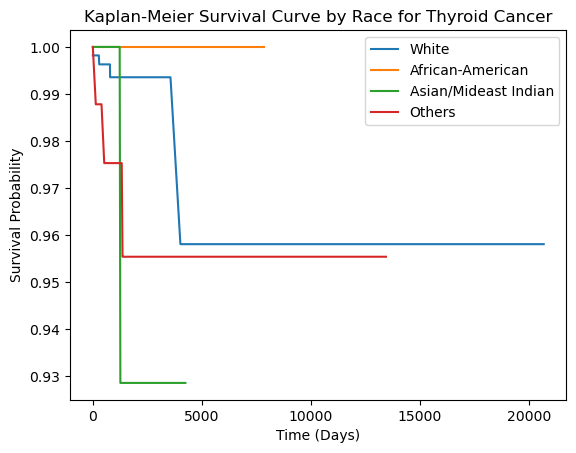

In [77]:
# Create a KaplanMeierFitter instance
kmf_thyroid_w = KaplanMeierFitter()
kmf_thyroid_aa = KaplanMeierFitter()
kmf_thyroid_ai = KaplanMeierFitter()
kmf_thyroid_o = KaplanMeierFitter()

ax = plt.subplot(111)

# White
kmf_thyroid_w.fit(white_subset['Time_to_Event'], event_observed=white_subset['dead'], label='White')
kmf_thyroid_w.survival_function_.plot(ax=ax)

# African-American
kmf_thyroid_aa.fit(african_american_subset['Time_to_Event'], event_observed=african_american_subset['dead'], label='African-American')
kmf_thyroid_aa.survival_function_.plot(ax=ax)

# Asian/Mideast Indian
kmf_thyroid_ai.fit(asian_subset['Time_to_Event'], event_observed=asian_subset['dead'], label='Asian/Mideast Indian')
kmf_thyroid_ai.survival_function_.plot(ax=ax)

# Others
kmf_thyroid_o.fit(others_subset['Time_to_Event'], event_observed=others_subset['dead'], label='Others')
kmf_thyroid_o.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Race for Thyroid Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

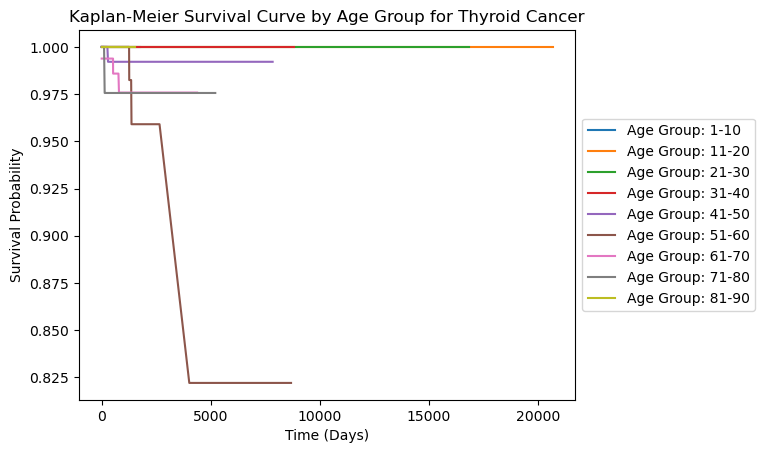

In [78]:
# Create a KaplanMeierFitter instance
kmf_thyroid_age = KaplanMeierFitter()

ax = plt.subplot(111)

# List of age group subsets
age_group_subsets = [
    age_1_10_subset, age_11_20_subset, age_21_30_subset, age_31_40_subset, age_41_50_subset,
    age_51_60_subset, age_61_70_subset, age_71_80_subset, age_81_90_subset
]

# Labels for each age group
age_group_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Iterate over age group subsets and plot survival curves
for i, age_group_subset in enumerate(age_group_subsets):
    kmf_thyroid_age.fit(age_group_subset['Time_to_Event'], event_observed=age_group_subset['dead'], label=f'Age Group: {age_group_labels[i]}')
    kmf_thyroid_age.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Age Group for Thyroid Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Colorectal Cancer survival rate by the different categories

In [79]:
# If census_status == 0, then dead == 0
# If census_status == 1, then dead == 1

colorectal_cancer_df.loc[colorectal_cancer_df.Censor_Status == 0, 'dead'] = 0
colorectal_cancer_df.loc[colorectal_cancer_df.Censor_Status == 1, 'dead'] = 1

In [80]:
colorectal_cancer_df['dead'].value_counts()

0.0    888
1.0     58
Name: dead, dtype: int64

In [81]:
colorectal_cancer_df['Age_Group'].value_counts()

61-70     261
51-60     235
71-80     165
41-50     144
81-90      68
31-40      50
21-30      13
91-100      8
11-20       2
Name: Age_Group, dtype: int64

In [82]:
colorectal_cancer_df['race'].value_counts()

White                     606
Black/African-American    263
Others                     47
Asian/Mideast Indian       30
Name: race, dtype: int64

In [83]:
# Create subsets for each combination
male_subset = colorectal_cancer_df[colorectal_cancer_df['sex'] == 'Male']
female_subset = colorectal_cancer_df[colorectal_cancer_df['sex'] == 'Female']

white_subset = colorectal_cancer_df[colorectal_cancer_df['race'] == 'White']
african_american_subset = colorectal_cancer_df[colorectal_cancer_df['race'] == 'Black/African-American']
asian_subset = colorectal_cancer_df[colorectal_cancer_df['race'] == 'Asian/Mideast Indian']
others_subset = colorectal_cancer_df[colorectal_cancer_df['race'] == 'Others']


age_11_20_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '11-20']
age_21_30_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '21-30']
age_31_40_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '31-40']
age_41_50_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '41-50']
age_51_60_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '51-60']
age_61_70_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '61-70']
age_71_80_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '71-80']
age_81_90_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '81-90']
age_91_100_subset = colorectal_cancer_df[colorectal_cancer_df['Age_Group'] == '91-100']

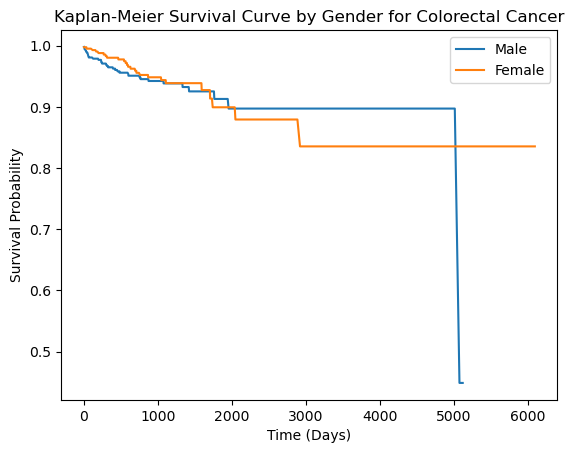

In [84]:
# Create a KaplanMeierFitter instance
kmf_colorectal_m = KaplanMeierFitter()
kmf_colorectal_f = KaplanMeierFitter()

ax = plt.subplot(111)

# Calculate and plot survival curve for males
kmf_colorectal_m.fit(male_subset['Time_to_Event'], event_observed=male_subset['dead'], label='Male')
kmf_colorectal_m.survival_function_.plot(ax=ax)

# Calculate and plot survival curve for females
kmf_colorectal_f.fit(female_subset['Time_to_Event'], event_observed=female_subset['dead'], label='Female')
kmf_colorectal_f.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Gender for Colorectal Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

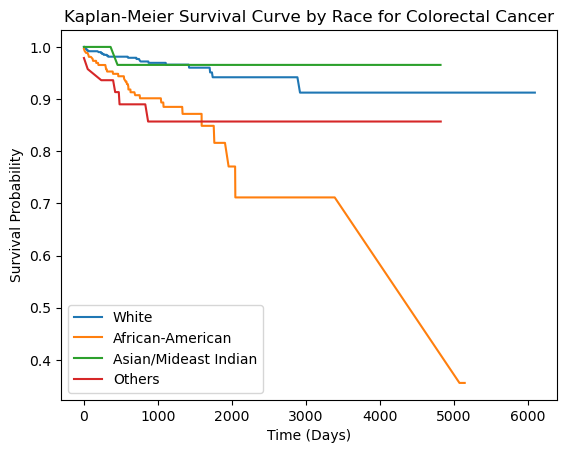

In [85]:
# Create a KaplanMeierFitter instance
kmf_colorectal_w = KaplanMeierFitter()
kmf_colorectal_aa = KaplanMeierFitter()
kmf_colorectal_ai = KaplanMeierFitter()
kmf_colorectal_o = KaplanMeierFitter()

ax = plt.subplot(111)

# White
kmf_colorectal_w.fit(white_subset['Time_to_Event'], event_observed=white_subset['dead'], label='White')
kmf_colorectal_w.survival_function_.plot(ax=ax)

# African-American
kmf_colorectal_aa.fit(african_american_subset['Time_to_Event'], event_observed=african_american_subset['dead'], label='African-American')
kmf_colorectal_aa.survival_function_.plot(ax=ax)

# Asian/Mideast Indian
kmf_colorectal_ai.fit(asian_subset['Time_to_Event'], event_observed=asian_subset['dead'], label='Asian/Mideast Indian')
kmf_colorectal_ai.survival_function_.plot(ax=ax)

# Others
kmf_colorectal_o.fit(others_subset['Time_to_Event'], event_observed=others_subset['dead'], label='Others')
kmf_colorectal_o.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Race for Colorectal Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

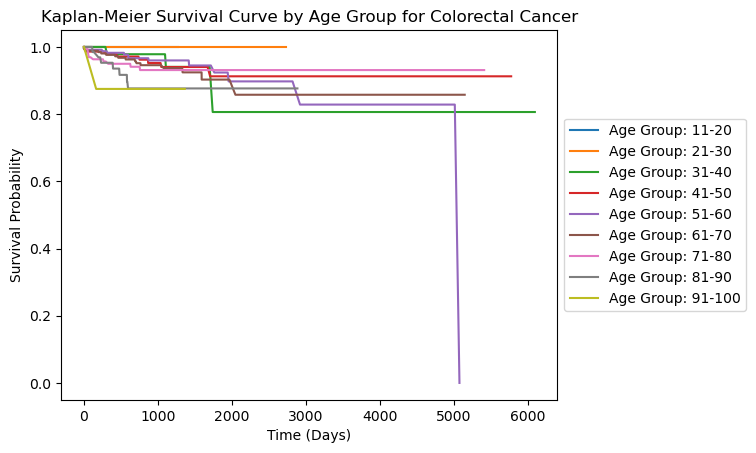

In [86]:
# Create a KaplanMeierFitter instance
kmf_colorectal_age = KaplanMeierFitter()

ax = plt.subplot(111)

# List of age group subsets
age_group_subsets = [
    age_11_20_subset, age_21_30_subset, age_31_40_subset, age_41_50_subset,
    age_51_60_subset, age_61_70_subset, age_71_80_subset, age_81_90_subset,
    age_91_100_subset
]

# Labels for each age group
age_group_labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Iterate over age group subsets and plot survival curves
for i, age_group_subset in enumerate(age_group_subsets):
    kmf_colorectal_age.fit(age_group_subset['Time_to_Event'], event_observed=age_group_subset['dead'], label=f'Age Group: {age_group_labels[i]}')
    kmf_colorectal_age.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Age Group for Colorectal Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Melanoma Cancer survival rate by the different categories

In [87]:
# If census_status == 0, then dead == 0
# If census_status == 1, then dead == 1

melanoma_cancer_df.loc[melanoma_cancer_df.Censor_Status == 0, 'dead'] = 0
melanoma_cancer_df.loc[melanoma_cancer_df.Censor_Status == 1, 'dead'] = 1

In [88]:
melanoma_cancer_df['dead'].value_counts()

0.0    329
1.0     17
Name: dead, dtype: int64

In [89]:
melanoma_cancer_df['Age_Group'].value_counts()

61-70     77
51-60     72
71-80     57
41-50     53
31-40     34
81-90     25
21-30     19
11-20      6
91-100     3
Name: Age_Group, dtype: int64

In [90]:
melanoma_cancer_df['race'].value_counts()

White                     316
Others                     14
Black/African-American     14
Asian/Mideast Indian        2
Name: race, dtype: int64

In [91]:
# Create subsets for each combination
male_subset = melanoma_cancer_df[melanoma_cancer_df['sex'] == 'Male']
female_subset = melanoma_cancer_df[melanoma_cancer_df['sex'] == 'Female']

white_subset = melanoma_cancer_df[melanoma_cancer_df['race'] == 'White']
african_american_subset = melanoma_cancer_df[melanoma_cancer_df['race'] == 'Black/African-American']
asian_subset = melanoma_cancer_df[melanoma_cancer_df['race'] == 'Asian/Mideast Indian']
others_subset = melanoma_cancer_df[melanoma_cancer_df['race'] == 'Others']


age_11_20_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '11-20']
age_21_30_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '21-30']
age_31_40_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '31-40']
age_41_50_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '41-50']
age_51_60_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '51-60']
age_61_70_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '61-70']
age_71_80_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '71-80']
age_81_90_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '81-90']
age_91_100_subset = melanoma_cancer_df[melanoma_cancer_df['Age_Group'] == '91-100']

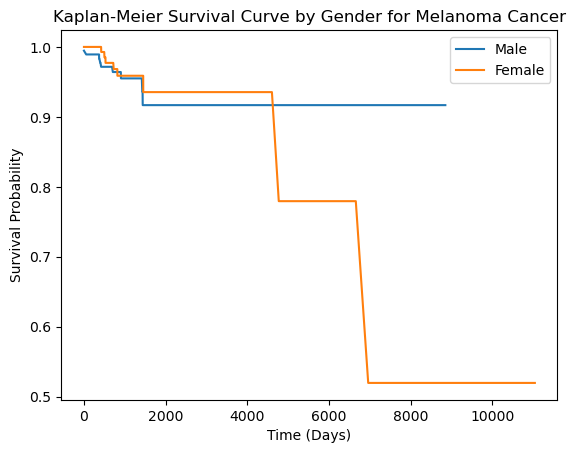

In [92]:
# Create a KaplanMeierFitter instance
kmf_melanoma_m = KaplanMeierFitter()
kmf_melanoma_f = KaplanMeierFitter()

ax = plt.subplot(111)

# Calculate and plot survival curve for males
kmf_melanoma_m.fit(male_subset['Time_to_Event'], event_observed=male_subset['dead'], label='Male')
kmf_melanoma_m.survival_function_.plot(ax=ax)

# Calculate and plot survival curve for females
kmf_melanoma_f.fit(female_subset['Time_to_Event'], event_observed=female_subset['dead'], label='Female')
kmf_melanoma_f.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Gender for Melanoma Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

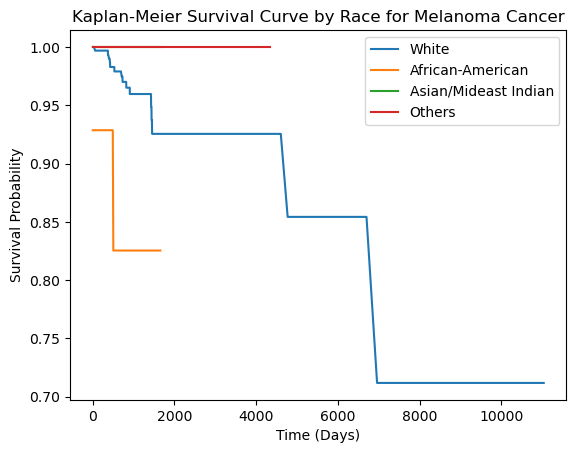

In [93]:
# Create a KaplanMeierFitter instance
kmf_melanoma_w = KaplanMeierFitter()
kmf_melanoma_aa = KaplanMeierFitter()
kmf_melanoma_ai = KaplanMeierFitter()
kmf_melanoma_o = KaplanMeierFitter()

ax = plt.subplot(111)

# White
kmf_melanoma_w.fit(white_subset['Time_to_Event'], event_observed=white_subset['dead'], label='White')
kmf_melanoma_w.survival_function_.plot(ax=ax)

# African-American
kmf_melanoma_aa.fit(african_american_subset['Time_to_Event'], event_observed=african_american_subset['dead'], label='African-American')
kmf_melanoma_aa.survival_function_.plot(ax=ax)

# Asian/Mideast Indian
kmf_melanoma_ai.fit(asian_subset['Time_to_Event'], event_observed=asian_subset['dead'], label='Asian/Mideast Indian')
kmf_melanoma_ai.survival_function_.plot(ax=ax)

# Others
kmf_melanoma_o.fit(others_subset['Time_to_Event'], event_observed=others_subset['dead'], label='Others')
kmf_melanoma_o.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Race for Melanoma Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

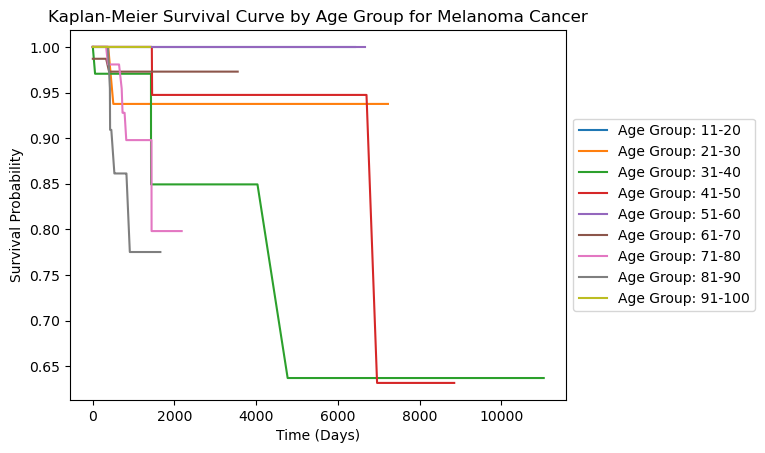

In [94]:
# Create a KaplanMeierFitter instance
kmf_melanoma_age = KaplanMeierFitter()

ax = plt.subplot(111)

# List of age group subsets
age_group_subsets = [
    age_11_20_subset, age_21_30_subset, age_31_40_subset, age_41_50_subset,
    age_51_60_subset, age_61_70_subset, age_71_80_subset, age_81_90_subset,
    age_91_100_subset
]

# Labels for each age group
age_group_labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Iterate over age group subsets and plot survival curves
for i, age_group_subset in enumerate(age_group_subsets):
    kmf_melanoma_age.fit(age_group_subset['Time_to_Event'], event_observed=age_group_subset['dead'], label=f'Age Group: {age_group_labels[i]}')
    kmf_melanoma_age.survival_function_.plot(ax=ax)


plt.title("Kaplan-Meier Survival Curve by Age Group for Melanoma Cancer")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()